In [32]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [34]:
def load_images_from_folder(folder, image_size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [43]:
dataset = 'https://www.kaggle.com/datasets/khushikhushikhushi/dog-breed-image-dataset'

In [47]:
od.download(dataset, force=True)

100%|█████████████████████████████████████████████████████████████████████████████| 3.98M/3.98M [00:00<00:00, 14.9MB/s]


In [48]:
data_dir = '.\\\dog-breed-image-dataset'
os.listdir(data_dir)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\justi\AppData\Local\Temp\ipykernel_20144\1902276609.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_dir = '.\\\dog-breed-image-dataset'


['dataset']

In [52]:
image_size = (150, 150)

In [61]:
X, y = load_images_from_folder(data_dir, image_size)

In [62]:
from PIL import Image
import os
import numpy as np

def load_images_from_folder(folder, image_size):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if not os.path.isdir(label_path):
            continue
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            try:
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
            except PermissionError:
                print(f"Permission denied: '{img_path}'")
            except Exception as e:
                print(f"Error loading image: '{img_path}'. Error: {e}")
    return np.array(images), np.array(labels)

data_dir = ".\\dog-breed-image-dataset\\dataset"
image_size = (128, 128)
X, y = load_images_from_folder(data_dir, image_size)


In [63]:
# Normalize pixel values to be between 0 and 1
X = X / 255.0

In [64]:
X, y = load_images_from_folder(data_dir, image_size)

In [65]:
X = X / 255.0

In [66]:
# Encode labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [67]:
# Convert labels to one-hot encoding
y = to_categorical(y)

In [68]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (773, 128, 128, 3)
X_val shape: (194, 128, 128, 3)
y_train shape: (773, 10)
y_val shape: (194, 10)


In [69]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

C:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    target.shape==(None, 10), output.shape==(None, 10),
    validation_data=(X_val, y_val)
)

SyntaxError: positional argument follows keyword argument (1146534533.py, line 8)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 классов для классификации
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\justi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 классов для классификации
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [90]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.1233 - loss: 24.0736 - val_accuracy: 0.3041 - val_loss: 2.3893
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.2971 - loss: 2.2400 - val_accuracy: 0.3144 - val_loss: 2.0583
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4530 - loss: 1.5905 - val_accuracy: 0.3866 - val_loss: 1.9957
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5436 - loss: 1.3345 - val_accuracy: 0.4897 - val_loss: 1.5274
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6615 - loss: 1.0011 - val_accuracy: 0.6804 - val_loss: 0.9067
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7874 - loss: 0.7240 - val_accuracy: 0.7268 - val_loss: 0.8670
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8692 - loss: 0.5060 - val_accuracy: 0.8557 - val_loss: 0.5037
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9434 - loss: 0.3588 - val_accuracy: 0.8247 - 

In [91]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy:.4f}')

# Save the model
model.save('dog_breed_classifier_model.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9944 - loss: 0.0667 


Validation accuracy: 0.9897


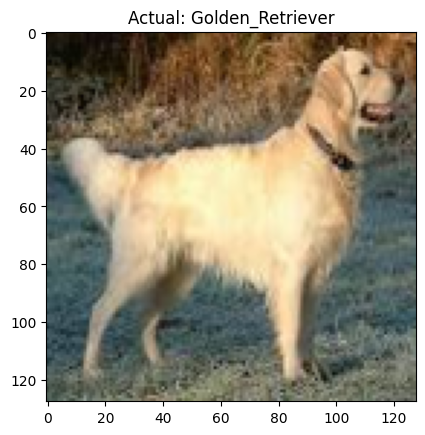

ValueError: cannot reshape array of size 49152 into shape (1,150,150,3)

In [92]:
# Function to predict the breed of a random image from the dataset
def predict_random_image(model, X, y, label_encoder):
    idx = random.randint(0, len(X) - 1)
    plt.imshow(X[idx])
    plt.title(f'Actual: {label_encoder.inverse_transform([np.argmax(y[idx])])[0]}')
    plt.show()

    # Predict the class of the selected image
    y_pred = model.predict(X[idx].reshape(1, 150, 150, 3))
    print(f'Prediction probabilities: {y_pred}')

    # Get the predicted class
    predicted_class = label_encoder.inverse_transform([np.argmax(y_pred)])
    print(f'Predicted class: {predicted_class[0]}')

# Load the trained model
model = load_model('dog_breed_classifier_model.h5')

# Predict for a random image
predict_random_image(model, X_val, y_val, label_encoder)